In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import yaml
import pickle
import os
import time

from utils.generate_data import *
from utils.sub_sampler import *
from utils.compute_barycenter import *
from utils.general_utils import *

data_path = 'data'

### Paper's Gaussian mixture experiment

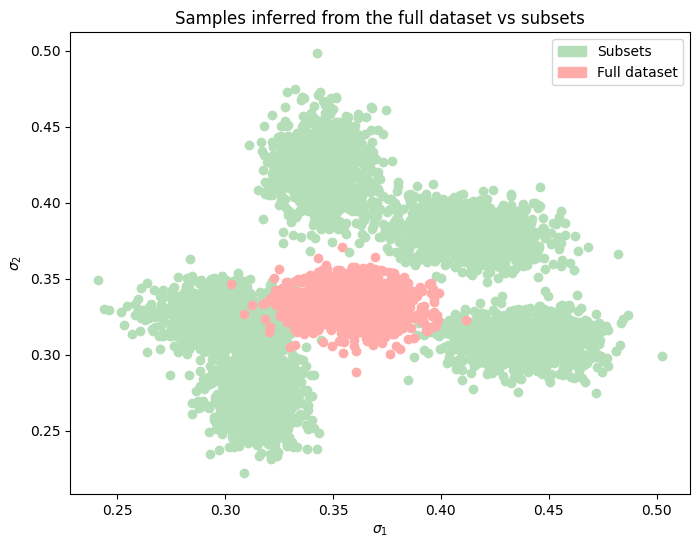

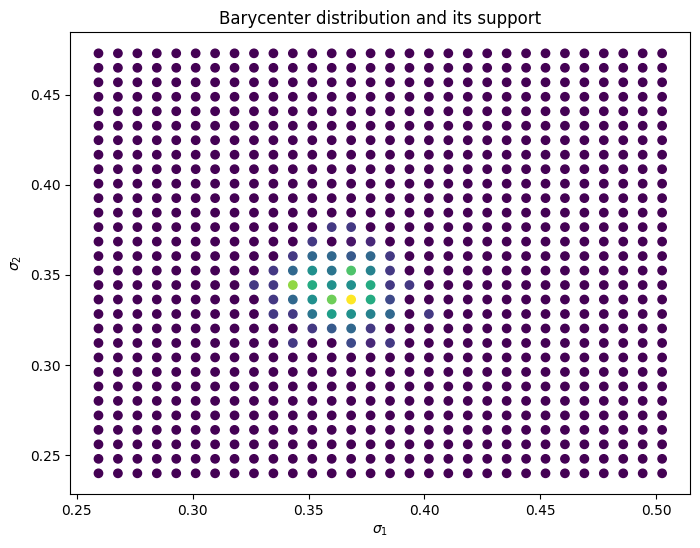

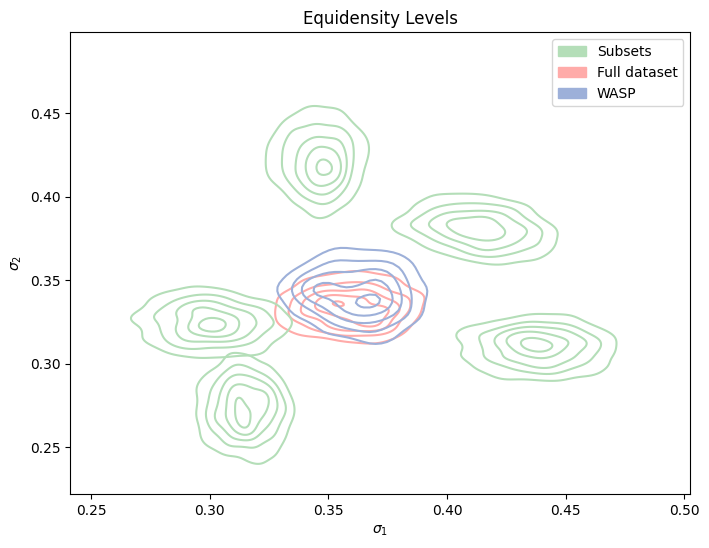

In [2]:
output = process_results('experience_1.yaml', proj='rho_1', npart=5, axis=['$\sigma_1$', '$\sigma_2$'])

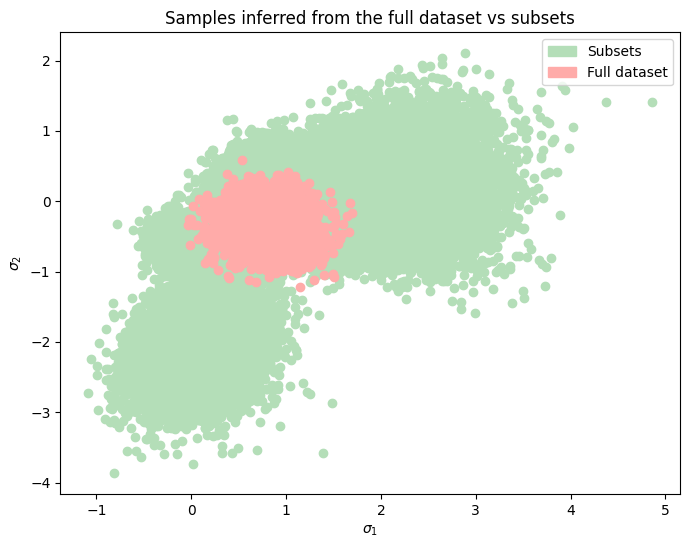

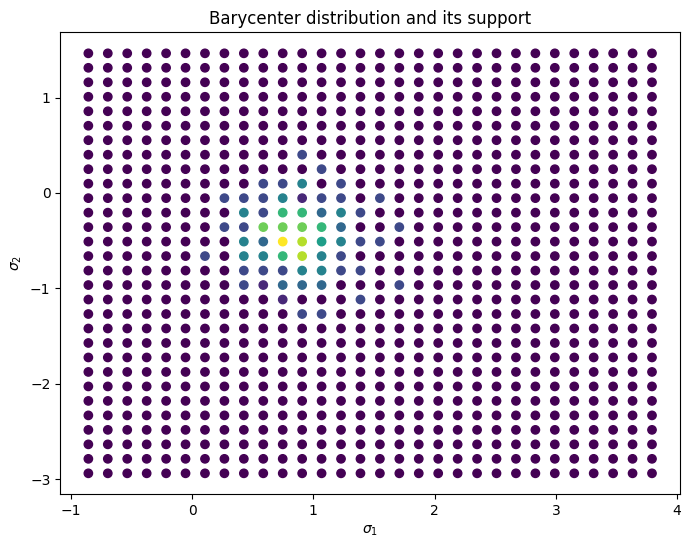

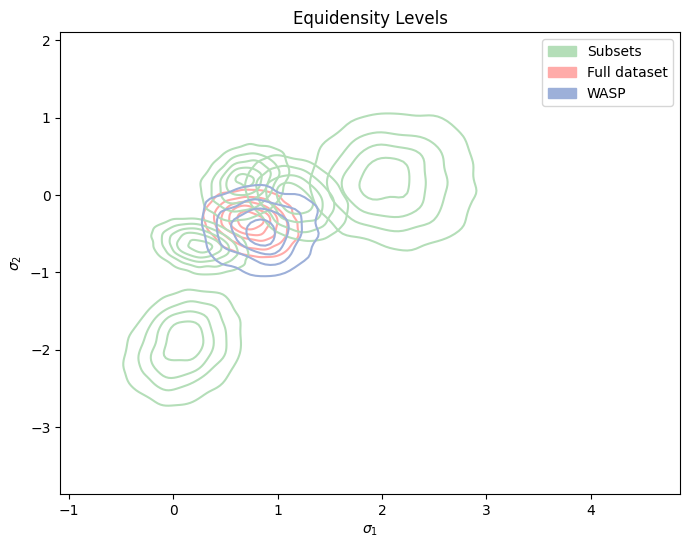

In [3]:
output = process_results('experience_logistic_regression.yaml', proj='identity_log', npart=5, axis=['$\sigma_1$', '$\sigma_2$'])

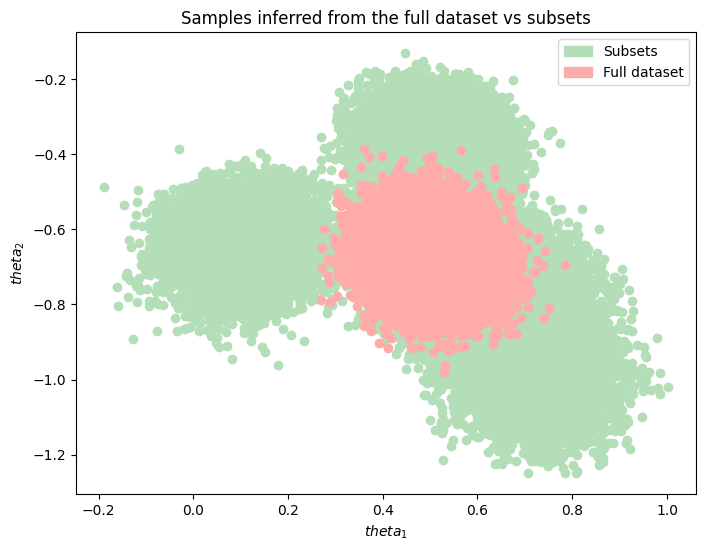

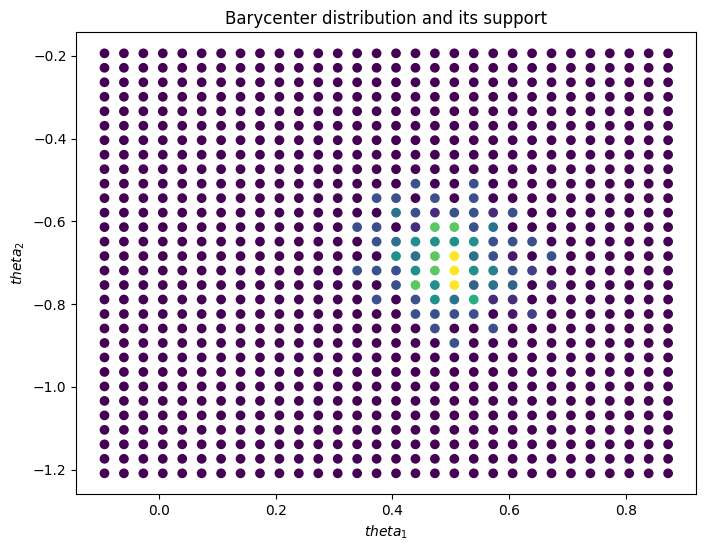

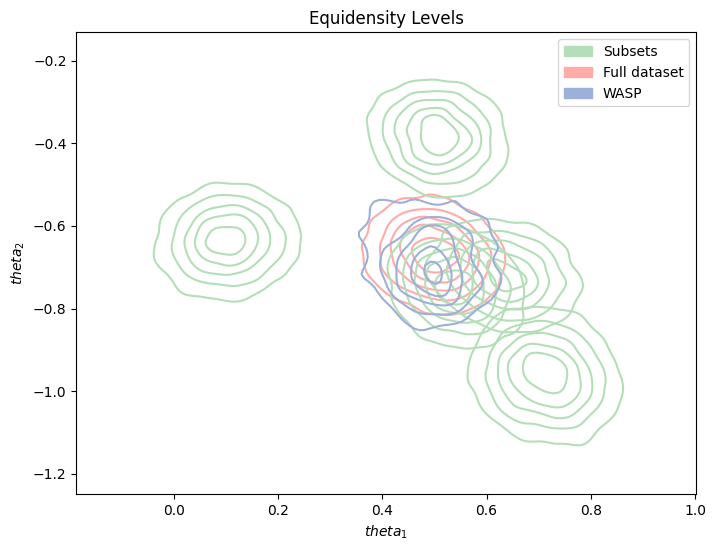

In [9]:
output = process_results('experience_logistic_regression_1k.yaml', proj='identity_log', npart=5, axis=['$theta_1$', '$theta_2$'])

### KMeans performances

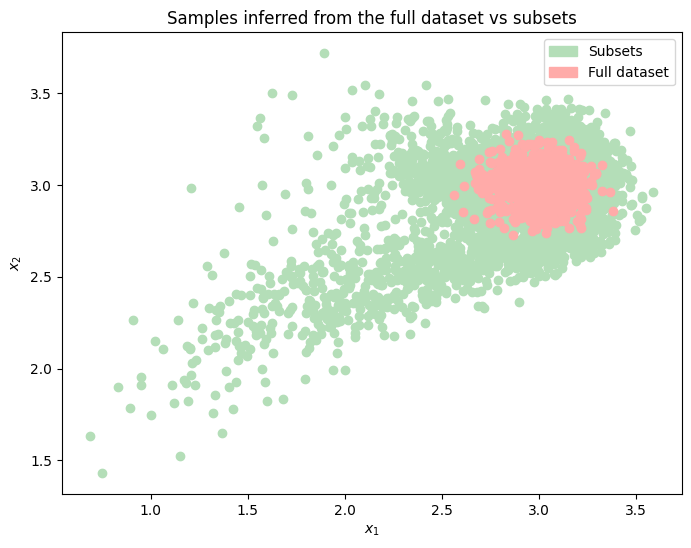

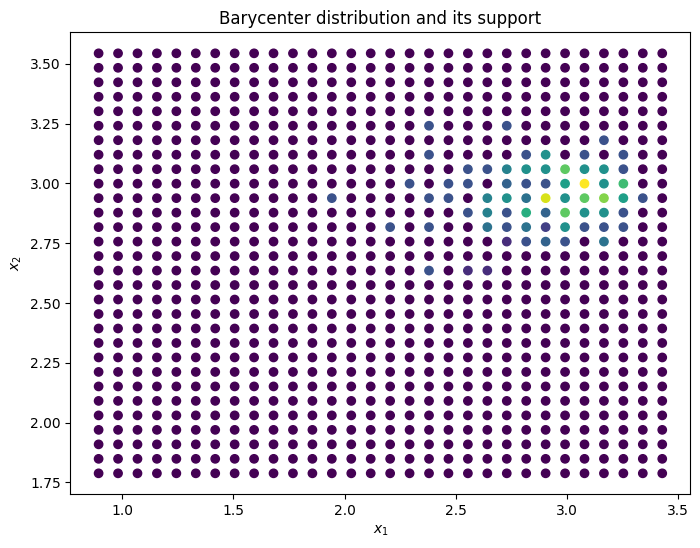

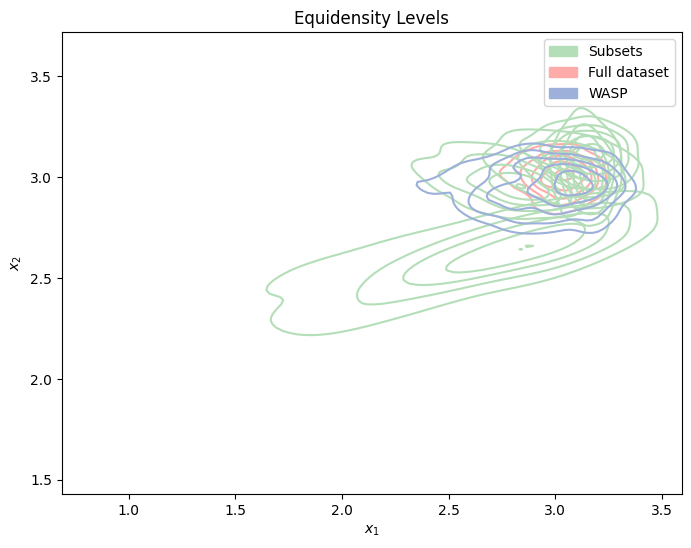

In [5]:
output = process_results('experience_2.yaml', proj='mean_sum', npart=5,axis=['$x_1$', '$x_2$'])

In [6]:
input_folder = output['input folder']
file_path = os.path.join(input_folder, "full_data.pkl")
reps = pd.read_pickle(file_path)

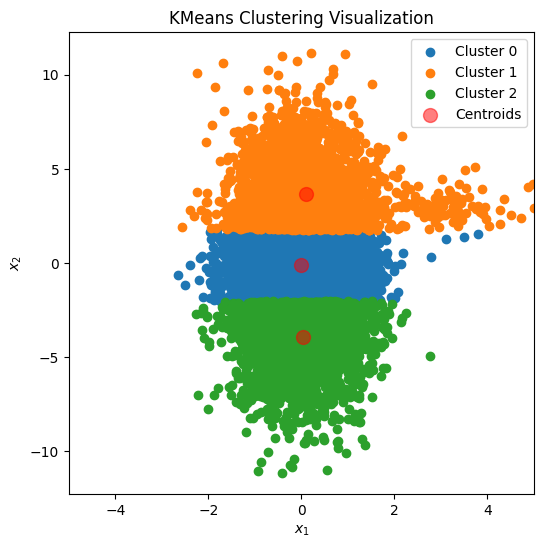

In [7]:
data = reps[0]['data']
nclust = 3
kmeans = KMeans(n_clusters=nclust, random_state=12345).fit(data)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(6, 6))

# Scatter plot of data points with color-coding for clusters
for cluster in range(nclust):
    cluster_data = data[cluster_labels == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids', alpha=0.5)

plt.title('KMeans Clustering Visualization')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim((-5, 5))
plt.show()